# Original code (with Batch normalization + Dropout)

Epoch 1/150
196/196 [==============================] - 7s 32ms/step - loss: 4.6339 - accuracy: 0.0416 - val_loss: 4.7632 - val_accuracy: 0.0250
Epoch 2/150
196/196 [==============================] - 6s 30ms/step - loss: 3.8046 - accuracy: 0.1184 - val_loss: 4.1949 - val_accuracy: 0.0726
Epoch 3/150
196/196 [==============================] - 6s 30ms/step - loss: 3.5320 - accuracy: 0.1597 - val_loss: 3.5940 - val_accuracy: 0.1521
Epoch 4/150
196/196 [==============================] - 6s 30ms/step - loss: 3.3672 - accuracy: 0.1864 - val_loss: 3.4963 - val_accuracy: 0.1768
Epoch 5/150
196/196 [==============================] - 6s 30ms/step - loss: 3.2432 - accuracy: 0.2094 - val_loss: 3.3970 - val_accuracy: 0.1948
Epoch 6/150
196/196 [==============================] - 6s 30ms/step - loss: 3.1288 - accuracy: 0.2286 - val_loss: 3.2679 - val_accuracy: 0.2130
Epoch 7/150
196/196 [==============================] - 6s 30ms/step - loss: 3.0516 - accuracy: 0.2408 - val_loss: 3.1685 - val_accuracy:

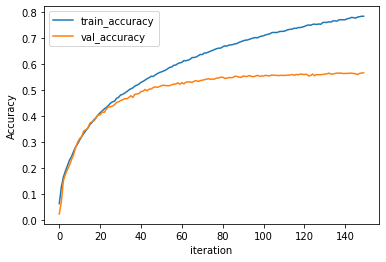

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
# z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))

blocks = 4
convs = [2, 2, 2, 2]
filters = [32, 64, 128, 128]

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(x_train, y_train, batch_size=batch_size, 
                    validation_data=(x_test, y_test), 
                    epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add Schedule

Epoch 1/150
196/196 [==============================] - 8s 31ms/step - loss: 4.4643 - accuracy: 0.0503 - val_loss: 5.5082 - val_accuracy: 0.0184
Epoch 2/150
196/196 [==============================] - 6s 29ms/step - loss: 3.4499 - accuracy: 0.1680 - val_loss: 3.5859 - val_accuracy: 0.1687
Epoch 3/150
196/196 [==============================] - 6s 28ms/step - loss: 3.0167 - accuracy: 0.2497 - val_loss: 2.8609 - val_accuracy: 0.2890
Epoch 4/150
196/196 [==============================] - 6s 29ms/step - loss: 2.6795 - accuracy: 0.3136 - val_loss: 2.5667 - val_accuracy: 0.3436
Epoch 5/150
196/196 [==============================] - 6s 29ms/step - loss: 2.4289 - accuracy: 0.3636 - val_loss: 2.3604 - val_accuracy: 0.3891
Epoch 6/150
196/196 [==============================] - 6s 29ms/step - loss: 2.2332 - accuracy: 0.4074 - val_loss: 2.2076 - val_accuracy: 0.4158
Epoch 7/150
196/196 [==============================] - 6s 29ms/step - loss: 2.0820 - accuracy: 0.4390 - val_loss: 2.0507 - val_accuracy:

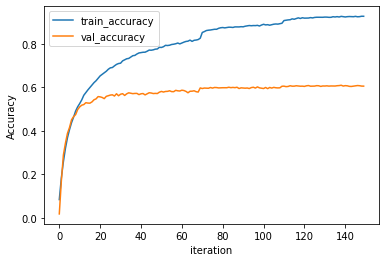

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))

blocks = 4
convs = [2, 2, 2, 2]
filters = [32, 64, 128, 128]

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(x_train, y_train, batch_size=batch_size, 
                    validation_data=(x_test, y_test), 
                    epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add data Augmentation

Epoch 1/150
196/196 [==============================] - 7s 30ms/step - loss: 4.5088 - accuracy: 0.0461 - val_loss: 4.8264 - val_accuracy: 0.0352
Epoch 2/150
196/196 [==============================] - 6s 29ms/step - loss: 3.5920 - accuracy: 0.1485 - val_loss: 3.4013 - val_accuracy: 0.1909
Epoch 3/150
196/196 [==============================] - 6s 29ms/step - loss: 3.2262 - accuracy: 0.2138 - val_loss: 3.0527 - val_accuracy: 0.2500
Epoch 4/150
196/196 [==============================] - 6s 29ms/step - loss: 2.9458 - accuracy: 0.2603 - val_loss: 2.7067 - val_accuracy: 0.3149
Epoch 5/150
196/196 [==============================] - 6s 30ms/step - loss: 2.7347 - accuracy: 0.3083 - val_loss: 2.4733 - val_accuracy: 0.3628
Epoch 6/150
196/196 [==============================] - 6s 30ms/step - loss: 2.5584 - accuracy: 0.3372 - val_loss: 2.3439 - val_accuracy: 0.3908
Epoch 7/150
196/196 [==============================] - 6s 29ms/step - loss: 2.4117 - accuracy: 0.3662 - val_loss: 2.2596 - val_accuracy:

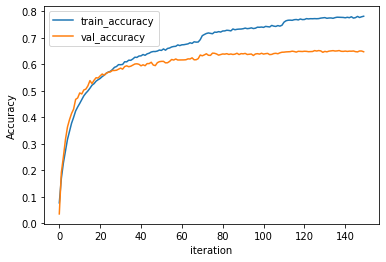

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))

blocks = 4
convs = [2, 2, 2, 2]
filters = [32, 64, 128, 128]

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add kernel_regularizer

Epoch 1/150
196/196 [==============================] - 8s 32ms/step - loss: 4.6161 - accuracy: 0.0528 - val_loss: 5.2490 - val_accuracy: 0.0202
Epoch 2/150
196/196 [==============================] - 6s 30ms/step - loss: 3.7467 - accuracy: 0.1488 - val_loss: 3.5223 - val_accuracy: 0.1969
Epoch 3/150
196/196 [==============================] - 6s 30ms/step - loss: 3.4099 - accuracy: 0.2072 - val_loss: 3.1093 - val_accuracy: 0.2675
Epoch 4/150
196/196 [==============================] - 6s 30ms/step - loss: 3.1231 - accuracy: 0.2610 - val_loss: 2.8948 - val_accuracy: 0.3107
Epoch 5/150
196/196 [==============================] - 6s 30ms/step - loss: 2.9117 - accuracy: 0.3011 - val_loss: 2.5967 - val_accuracy: 0.3656
Epoch 6/150
196/196 [==============================] - 6s 30ms/step - loss: 2.7192 - accuracy: 0.3383 - val_loss: 2.4633 - val_accuracy: 0.4010
Epoch 7/150
196/196 [==============================] - 6s 31ms/step - loss: 2.5900 - accuracy: 0.3694 - val_loss: 2.3942 - val_accuracy:

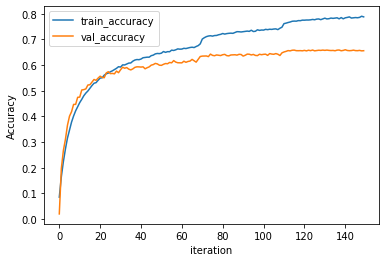

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

blocks = 4
convs = [2, 2, 2, 2]
filters = [32, 64, 128, 128]
weight_decay = 1e-5

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay, weight_decay)))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Increase filters

Epoch 1/150
196/196 [==============================] - 16s 76ms/step - loss: 5.1777 - accuracy: 0.0576 - val_loss: 5.8127 - val_accuracy: 0.0245
Epoch 2/150
196/196 [==============================] - 14s 72ms/step - loss: 4.1449 - accuracy: 0.1785 - val_loss: 4.2320 - val_accuracy: 0.1784
Epoch 3/150
196/196 [==============================] - 14s 73ms/step - loss: 3.6265 - accuracy: 0.2673 - val_loss: 3.2457 - val_accuracy: 0.3374
Epoch 4/150
196/196 [==============================] - 14s 73ms/step - loss: 3.2705 - accuracy: 0.3337 - val_loss: 2.9870 - val_accuracy: 0.3960
Epoch 5/150
196/196 [==============================] - 14s 73ms/step - loss: 3.0384 - accuracy: 0.3832 - val_loss: 2.8168 - val_accuracy: 0.4391
Epoch 6/150
196/196 [==============================] - 15s 74ms/step - loss: 2.8696 - accuracy: 0.4254 - val_loss: 2.8236 - val_accuracy: 0.4532
Epoch 7/150
196/196 [==============================] - 15s 74ms/step - loss: 2.7574 - accuracy: 0.4636 - val_loss: 2.6390 - val_ac

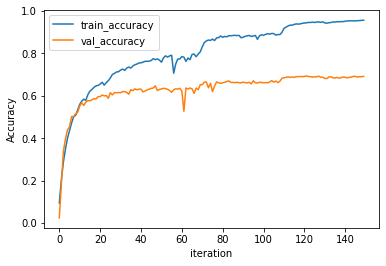

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

blocks = 4
convs = [2, 2, 2, 2]
filters = [64, 128, 256, 512]
weight_decay = 1e-5

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay, weight_decay)))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Increase Convs

Epoch 1/150
196/196 [==============================] - 25s 114ms/step - loss: 5.7662 - accuracy: 0.0384 - val_loss: 6.3179 - val_accuracy: 0.0411
Epoch 2/150
196/196 [==============================] - 22s 113ms/step - loss: 4.7458 - accuracy: 0.1394 - val_loss: 5.0113 - val_accuracy: 0.1432
Epoch 3/150
196/196 [==============================] - 23s 115ms/step - loss: 4.1705 - accuracy: 0.2219 - val_loss: 3.8884 - val_accuracy: 0.2723
Epoch 4/150
196/196 [==============================] - 23s 116ms/step - loss: 3.7346 - accuracy: 0.2889 - val_loss: 3.8533 - val_accuracy: 0.3042
Epoch 5/150
196/196 [==============================] - 23s 116ms/step - loss: 3.4575 - accuracy: 0.3326 - val_loss: 3.7075 - val_accuracy: 0.3037
Epoch 6/150
196/196 [==============================] - 23s 117ms/step - loss: 3.3614 - accuracy: 0.3569 - val_loss: 3.1296 - val_accuracy: 0.4037
Epoch 7/150
196/196 [==============================] - 23s 117ms/step - loss: 3.2034 - accuracy: 0.3901 - val_loss: 3.0813 -

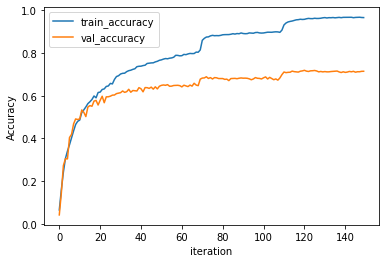

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

blocks = 4
convs = [3, 3, 3, 3]
filters = [64, 128, 256, 512]
weight_decay = 1e-5

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay, weight_decay)))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Increase blocks


Epoch 1/150
196/196 [==============================] - 41s 189ms/step - loss: 8.1436 - accuracy: 0.0236 - val_loss: 7.4132 - val_accuracy: 0.0274
Epoch 2/150
196/196 [==============================] - 37s 186ms/step - loss: 6.5306 - accuracy: 0.0734 - val_loss: 5.8928 - val_accuracy: 0.0952
Epoch 3/150
196/196 [==============================] - 37s 189ms/step - loss: 5.4383 - accuracy: 0.1200 - val_loss: 5.0719 - val_accuracy: 0.1322
Epoch 4/150
196/196 [==============================] - 38s 191ms/step - loss: 4.7423 - accuracy: 0.1628 - val_loss: 4.5599 - val_accuracy: 0.1901
Epoch 5/150
196/196 [==============================] - 38s 192ms/step - loss: 4.2491 - accuracy: 0.2159 - val_loss: 4.1439 - val_accuracy: 0.2346
Epoch 6/150
196/196 [==============================] - 38s 193ms/step - loss: 3.9364 - accuracy: 0.2604 - val_loss: 3.7493 - val_accuracy: 0.2899
Epoch 7/150
196/196 [==============================] - 38s 193ms/step - loss: 3.7631 - accuracy: 0.2971 - val_loss: 3.6356 -

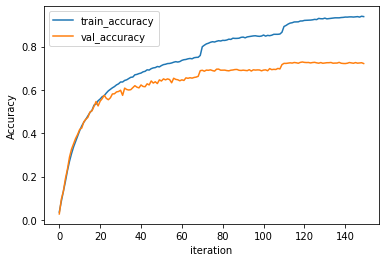

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# data preparation
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE) )

test_dataset = (test_dataset.batch(batch_size))

# model
model = keras.models.Sequential()
model.add(keras.Input(shape=x_train.shape[1:]))

blocks = 5
convs = [3, 3, 3, 3, 3]
filters = [64, 128, 256, 512, 1024]
weight_decay = 1e-5

for block in range(blocks):
  for conv in range(convs[block]):
    model.add(keras.layers.Conv2D(filters[block], (3, 3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay, weight_decay)))
    model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Dropout(0.3))
    

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add skip connection

Epoch 1/150
196/196 [==============================] - 50s 193ms/step - loss: 8.5421 - accuracy: 0.0161 - val_loss: 5.4588 - val_accuracy: 0.0724
Epoch 2/150
196/196 [==============================] - 37s 190ms/step - loss: 5.7802 - accuracy: 0.0618 - val_loss: 4.9135 - val_accuracy: 0.1469
Epoch 3/150
196/196 [==============================] - 37s 187ms/step - loss: 5.1751 - accuracy: 0.1155 - val_loss: 4.5210 - val_accuracy: 0.2019
Epoch 4/150
196/196 [==============================] - 37s 189ms/step - loss: 4.7621 - accuracy: 0.1636 - val_loss: 4.2802 - val_accuracy: 0.2392
Epoch 5/150
196/196 [==============================] - 37s 188ms/step - loss: 4.4749 - accuracy: 0.2069 - val_loss: 3.9579 - val_accuracy: 0.2945
Epoch 6/150
196/196 [==============================] - 37s 188ms/step - loss: 4.2005 - accuracy: 0.2505 - val_loss: 3.8040 - val_accuracy: 0.3189
Epoch 7/150
196/196 [==============================] - 37s 188ms/step - loss: 3.9996 - accuracy: 0.2771 - val_loss: 3.6942 -

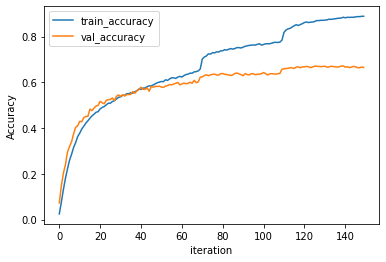

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import regularizers, optimizers
import matplotlib.pyplot as plt


# data preparation
(x_train, y_train),(x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#z-score normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std  = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean)/(std+1e-7)

# model
inputs = tf.keras.Input(shape=x_train.shape[1:])
x = inputs

blocks = 4
convs = [3, 3, 3, 3]
filters = [64, 128, 256, 512]
weight_decay = 1e-5
drops = [0.3, 0.3, 0.4, 0.4]

for block in range(blocks):
  previous = x
  for conv in range(convs[block]):
    x = Conv2D(filters[block], (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
    x = tfa.layers.InstanceNormalization()(x)
    x = BatchNormalization()(x)
  #x = keras.layers.concatenate([x, previous]) 
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = Dropout(drops[block])(x)
    

# flatten
x = Flatten()(x)
x = Dense(256)(x)
outputs = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Declare optimization method and loss function
batch_size = 256
epochs = 150
steps = x_train.shape[0] // batch_size

boundaries = [steps*70, steps*110]
values = [0.001, 0.0005, 0.0001]
schedules = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
opt_adam  = keras.optimizers.Adam(learning_rate=schedules)

model.compile(optimizer=opt_adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# data augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def process_data(image, label):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.resize(image, (38, 38))
        image = tf.image.random_crop(image, size=[32, 32, 3])
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)

    return image, label

train_batches = (train_dataset.shuffle(256*4)
                              .map(process_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                              .batch(batch_size)
                              .prefetch(tf.data.experimental.AUTOTUNE))

test_dataset = (test_dataset.batch(batch_size))

# training
history_data = model.fit(train_batches, 
                         validation_data=test_dataset,
                         epochs=epochs, verbose=1)

# Graph
plt.plot(history_data.history['accuracy'], label="train_accuracy")
plt.plot(history_data.history['val_accuracy'], label="val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()